In [2]:
import sklearn.model_selection as sklms
import sklearn.neighbors as skln 
import numpy as np 
x=np.zeros((2000,2))
x[:1000,:]=np.random.multivariate_normal((0,1),[[1,0],[0,1]],1000)
x[1000:,:]=np.random.multivariate_normal((1,0),[[1,0],[0,1]],1000)

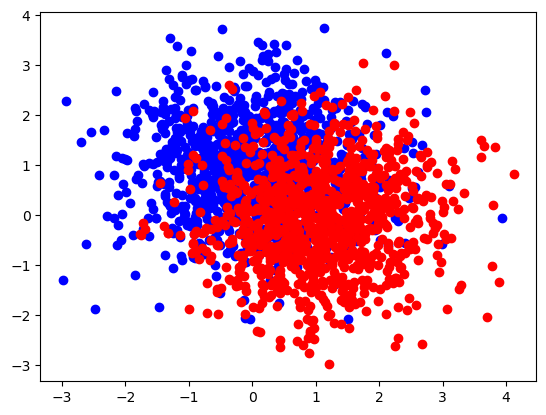

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x[:1000,0],x[:1000,1],c="blue")
plt.scatter(x[1000:,0],x[1000:,1],c='red')

In [4]:
y=np.ones(2000)
y[1000:]=-1*np.ones(1000)
knn=skln.KNeighborsClassifier(n_neighbors=5).fit(x,y)

In [5]:
knn.predict([[5,0]])

array([-1.])

In [6]:
knn.score(x,y)

0.808

In [7]:
x_train,x_test,y_train,y_test=sklms.train_test_split(x,y,test_size=.2)

In [8]:
x_test.shape

(400, 2)

In [9]:
knn5=skln.KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

In [10]:
knn5.score(x_train,y_train)

0.80625

In [11]:
knn5.score(x_test,y_test)

0.7225

In [12]:
knn1=skln.KNeighborsClassifier(n_neighbors=1).fit(x_train,y_train)

In [13]:
knn1.score(x_train,y_train),knn1.score(x_test,y_test)

(1.0, 0.685)

In [14]:
y=np.abs(x[:,0])-np.abs(x[:,1])

In [15]:
x_train,x_test,y_train,y_test=sklms.train_test_split(x,y,test_size=.2)
knn5=skln.KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)
knn1=skln.KNeighborsRegressor(n_neighbors=1).fit(x_train,y_train)

In [16]:
knn5.score(x_train,y_train),knn5.score(x_test,y_test),knn1.score(x_train,y_train),knn1.score(x_test,y_test)

(0.9967114871045089, 0.9948642512022728, 1.0, 0.9914456331827138)

In [17]:
import sklearn.linear_model as skllm
lin=skllm.LinearRegression().fit(x_train,y_train)

In [18]:
lin.score(x_train,y_train),lin.score(x_test,y_test)

(0.3096899248119289, 0.33623832402163734)

In [19]:
lin.coef_,lin.intercept_

(array([ 0.38608028, -0.28611677]), -0.07394620436500622)

In [20]:
y=np.ones(2000)
y[1000:]=-1*np.ones(1000)
x_train,x_test,y_train,y_test=sklms.train_test_split(x,y,test_size=.2)


In [21]:
lin=skllm.RidgeClassifier(alpha=0).fit(x_train,y_train)

In [22]:
lin.score(x_train,y_train),lin.score(x_test,y_test)

(0.76125, 0.765)

In [23]:
rr=skllm.Ridge(alpha=1000).fit(x_train,y_train)
lr=skllm.Lasso(alpha=0.1).fit(x_train,y_train)

In [24]:
rr.score(x_test,y_test), lr.score(x_test,y_test)

(0.32267686776127114, 0.3384406342814611)

In [25]:
rr=skllm.RidgeCV(alphas=[0.01,0.1,1,10,100,1000,1e4,1e5]).fit(x_train,y_train)
lr=skllm.LassoCV(alphas=[1e-6,1e-5,1e-4,1e-3,0.01,0.1,1,10,100]).fit(x_train,y_train)

In [26]:
ridge=skllm.RidgeClassifier()
par={'alpha':(1,10,100,1000,1e4,1e5,1e6)}
lin=sklms.GridSearchCV(ridge,par)
lin.fit(x,y)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': (1, 10, 100, 1000, 10000.0, 100000.0,
                                   1000000.0)})

In [27]:
lin.cv_results_

{'mean_fit_time': array([0.00265079, 0.00253296, 0.00260553, 0.00281019, 0.00310416,
        0.00300722, 0.00289736]),
 'std_fit_time': array([0.00037662, 0.00055672, 0.00067428, 0.00044124, 0.00062225,
        0.00080592, 0.00095863]),
 'mean_score_time': array([0.00085797, 0.00076461, 0.00059996, 0.00079093, 0.00077834,
        0.00078759, 0.00066843]),
 'std_score_time': array([3.60705504e-04, 2.89613359e-04, 6.58630365e-05, 4.22306909e-04,
        2.03609109e-04, 2.31254597e-04, 1.51072186e-04]),
 'param_alpha': masked_array(data=[1, 10, 100, 1000, 10000.0, 100000.0, 1000000.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000},
  {'alpha': 10000.0},
  {'alpha': 100000.0},
  {'alpha': 1000000.0}],
 'split0_test_score': array([0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225]),
 'split1_test_score': array([0.7725, 0.7725, 0.7725

In [28]:
# import numpy as np 
# import matplotlib.pyplot as plt

# m1=np.random.multivariate_normal((1,0),[[1,0],[0,1]],10)
# m2=np.random.multivariate_normal((0,1),[[1,0],[0,1]],10)
# x=np.zeros((200,2))
# y=np.ones(200)
# y[100:]=-1*np.ones(100)
# for i in range(10):
#     x[10*i:10*i+10]=np.random.multivariate_normal(m1[i],[[0.1,0],[0,0.1]],10)
#     x[10*(10+i):10*(10+i)+10]=np.random.multivariate_normal(m2[i],[[0.1,0],[0,0.1]],10)

# plt.scatter(x[:100,0],x[:100,1],c="blue")
# plt.scatter(x[100:,0],x[100:,1],c="red")
# plt.plot()
# # print(x)



In [29]:
x

array([[ 0.29814982, -0.38001732],
       [ 0.49691919,  0.97706894],
       [-1.85479623,  1.71954648],
       ...,
       [ 1.1333903 ,  0.68271555],
       [ 0.79439542, -0.56544188],
       [ 0.55725897,  0.22029168]])

In [30]:
import sklearn.tree as sklt

In [31]:
y=np.abs(x[:,0])-np.abs(x[:,1])

In [32]:
dtree=sklt.DecisionTreeRegressor(max_depth=10,min_samples_leaf=10)
dtree.fit(x,y)
dtree.score(x,y)

0.9715879150229623

[Text(0.6444659280936454, 0.9545454545454546, 'x[0] <= 1.228\nsquared_error = 1.101\nsamples = 2000\nvalue = 0.001'),
 Text(0.3751567725752508, 0.8636363636363636, 'x[1] <= 1.219\nsquared_error = 0.723\nsamples = 1487\nvalue = -0.364'),
 Text(0.11925167224080267, 0.7727272727272727, 'x[1] <= -1.304\nsquared_error = 0.416\nsamples = 1074\nvalue = -0.033'),
 Text(0.026755852842809364, 0.6818181818181818, 'x[1] <= -1.971\nsquared_error = 0.259\nsamples = 83\nvalue = -1.141'),
 Text(0.013377926421404682, 0.5909090909090909, 'x[0] <= 0.828\nsquared_error = 0.153\nsamples = 21\nvalue = -1.661'),
 Text(0.006688963210702341, 0.5, 'squared_error = 0.054\nsamples = 10\nvalue = -1.967'),
 Text(0.020066889632107024, 0.5, 'squared_error = 0.08\nsamples = 11\nvalue = -1.383'),
 Text(0.04013377926421405, 0.5909090909090909, 'x[0] <= 0.758\nsquared_error = 0.172\nsamples = 62\nvalue = -0.965'),
 Text(0.033444816053511704, 0.5, 'x[0] <= -0.373\nsquared_error = 0.148\nsamples = 45\nvalue = -1.107'),
 Te

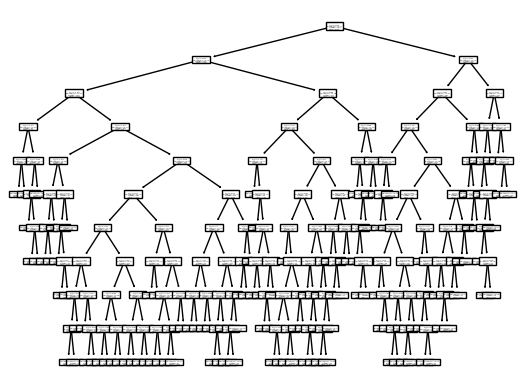

In [33]:
sklt.plot_tree(dtree)

In [34]:
y,y[1000:]=np.ones(2000),-1*np.ones(1000)

In [35]:
dtree=sklt.DecisionTreeClassifier(max_depth=2).fit(x,y)

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.705\ngini = 0.5\nsamples = 2000\nvalue = [1000, 1000]'),
 Text(0.25, 0.5, 'x[1] <= 0.136\ngini = 0.443\nsamples = 1149\nvalue = [380, 769]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.483\nsamples = 392\nvalue = [232, 160]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.315\nsamples = 757\nvalue = [148, 609]'),
 Text(0.75, 0.5, 'x[1] <= 1.385\ngini = 0.396\nsamples = 851\nvalue = [620, 231]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.33\nsamples = 725\nvalue = [574, 151]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.464\nsamples = 126\nvalue = [46, 80]')]

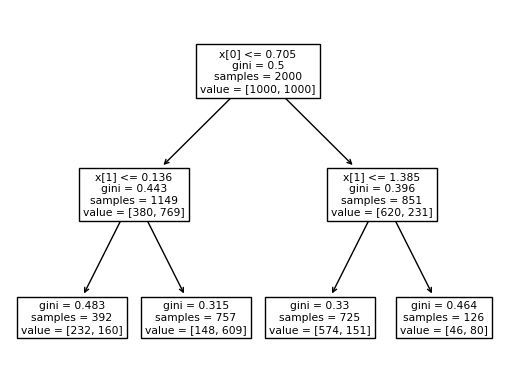

In [36]:
dtree.score(x,y)
sklt.plot_tree(dtree)

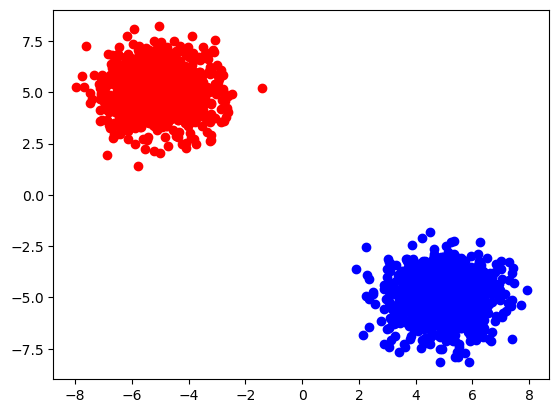

In [37]:
import numpy as np
import sklearn.svm as svm 
import matplotlib.pyplot as plt 
x=np.zeros((2000,2)) 
x[:1000,:]=np.random.multivariate_normal((-5,5),np.eye(2),1000)
x[1000:,:]=np.random.multivariate_normal((5,-5),np.eye(2),1000) 
plt.scatter(x[:1000,0],x[:1000,1],c='red')
plt.scatter(x[1000:,0],x[1000:,1],c='blue')



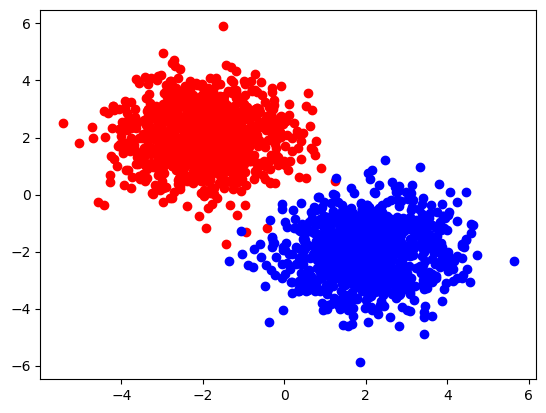

In [38]:
x[:1000,:]=np.random.multivariate_normal((-2,2),np.eye(2),1000)
x[1000:,:]=np.random.multivariate_normal((2,-2),np.eye(2),1000) 
plt.scatter(x[:1000,0],x[:1000,1],c='red')
plt.scatter(x[1000:,0],x[1000:,1],c='blue')
y=np.ones(2000)
y[1000:]=-1*np.ones(1000)


In [39]:
clf=svm.SVC(C=1000,kernel='linear').fit(x,y)

In [40]:
clf.score(x,y)

0.9975

In [41]:
clf.coef_,clf.intercept_

(array([[-2.6604542,  2.6059856]]), array([0.88975861]))

In [42]:
clf.dual_coef_

array([[-1000.        ,  -546.58785072, -1000.        , -1000.        ,
         -480.9847391 , -1000.        ,  1000.        ,  1000.        ,
         1000.        ,  1000.        ,  1000.        ,    27.57258982]])

In [43]:
clf.support_vectors_

array([[-1.06417947, -1.26867441],
       [ 1.27910356,  0.58058648],
       [-0.35301596, -0.88456771],
       [-0.0511262 , -0.32148266],
       [ 0.4040076 , -0.31278688],
       [-0.06790616, -0.49195318],
       [-0.93943509, -1.3279249 ],
       [-0.43701052, -1.16900656],
       [ 1.2507398 ,  0.47663157],
       [ 0.90631122,  0.93318683],
       [-1.4407129 , -1.72622421],
       [ 0.53252892,  0.58612919]])

In [44]:
clf.decision_function([[ 0.46366476,  0.50748256]])

array([0.978692])

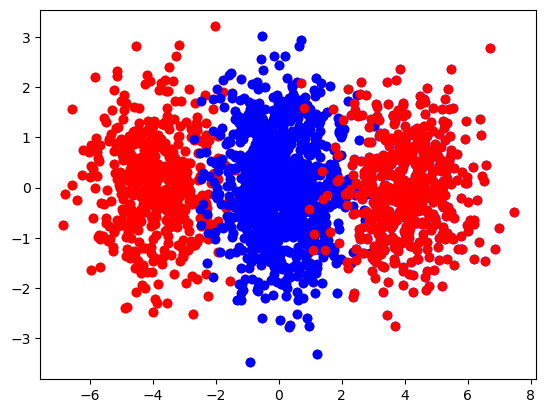

In [45]:
x[:500,:]=np.random.multivariate_normal((-4,0),np.eye(2),500)
x[1500:,:]=np.random.multivariate_normal((4,0),np.eye(2),500) 
x[500:1500,:]=np.random.multivariate_normal((0,0),np.eye(2),1000)
plt.scatter(x[:1000,0],x[:1000,1],c='red')
plt.scatter(x[1000:,0],x[1000:,1],c='blue')
y=np.ones(2000)
y[500:1500]=-1*np.ones(1000)
plt.scatter(x[:500,0],x[:500,1],c='red')
plt.scatter(x[500:1500,0],x[500:1500,1],c='blue')
plt.scatter(x[1500:,0],x[1500:,1],c='red')

In [46]:
clf=svm.SVC(C=1000,kernel='rbf',gamma=10).fit(x,y)

In [47]:
clf.score(x,y)

0.9955

In [48]:
import sklearn.model_selection as sklms
par={'C':[1,10],'kernel':['linear','rbf'],'gamma':[0,10,100]}
clf=svm.SVC()
crvld=sklms.GridSearchCV(clf,par).fit(x,y)

In [49]:
crvld.best_params_

{'C': 1, 'gamma': 10, 'kernel': 'rbf'}

In [1]:
import tensorflow as tf
from tensorflow import keras 


2024-04-10 23:16:29.346449: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 23:16:29.461640: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 23:16:30.010342: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 23:16:32.253852: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()


In [9]:
x_train

AttributeError: 'numpy.ndarray' object has no attribute 'head'

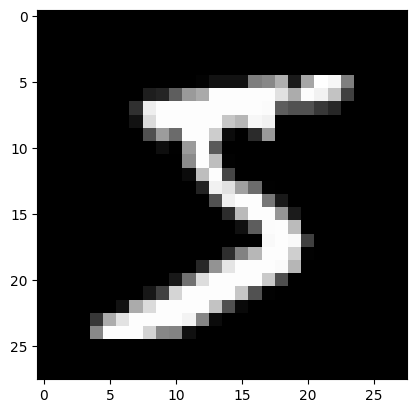

In [10]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0,:,:],cmap='gray')

In [ ]:
import sklearn.neural_network as sklnn 
nn=sklnn.MLPClassifier(hidden_layer_sizes=(100),activation='logistic',solver='adam',max_iter=1000)

In [8]:
import numpy as np 
np.array([[1,2,3,4],[4,5,6,7]])-np.array([0,1]).reshape(2,1)

array([[1, 2, 3, 4],
       [3, 4, 5, 6]])

In [1]:
import numpy as np 
import sklearn.neural_network as nn
import sklearn.model_selection as ms
import matplotlib.pyplot as plt 


x=np.random.uniform(-10,10,(10000,2))
print(x.shape)
y=np.sum(x*x,axis=1)

(10000, 2)


In [6]:
mod=nn.MLPRegressor(solver='adam',max_iter=1000,hidden_layer_sizes=(5),).fit(x,y)

In [ ]:
import keras as kr 
model=kr.Sequential()
model.add(kr.Input(shape=(2,)))
model.add(kr.Layer.)


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [4]:
import sklearn.model_selection as ms
import keras as kr

2024-04-16 15:55:30.054484: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 15:55:30.145159: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 15:55:30.541491: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 15:55:31.933206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
x_train,x_test,y_train,y_test=ms.train_test_split(X,y,test_size=.25)
par={"units":[5, 10, 20, 50, 100],'activation':['relu','tanh','sigmoid']}
modkr=kr.models.Sequential( [kr.layers.Input(shape=(57,)),
                             kr.layers.Dense()
                             kr.layers.Dense(2,activation="sigmoid")
                             ]
)

TypeError: Dense.__init__() missing 1 required positional argument: 'units'

In [25]:
import scipy.optimize as opt
f=lambda x,c: x*x+c
c=1
opt.fmin(f,x0=1,args=(c,))

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 17
         Function evaluations: 34


array([-8.8817842e-16])

In [11]:
from scipy.optimize import minimize

def obj_func(G, a, b, c):
    print(G)
    return a*G**2 + b*G + c

initial_guess = 10
a, b, c = 2, -4, 7

result = minimize(obj_func, x0=initial_guess, args=(a, b, c))

print(f"\nMinimizer = {result.x}")
print(f"  Minimum = {result.fun}")

[10.]
[10.00000001]
[8.99]
[8.99000001]
[6.82085113]
[6.82085114]
[1.62275043]
[1.62275045]
[1.]
[1.00000001]

Minimizer = [1.]
  Minimum = 5.0


In [24]:
(1,2)

(1, 2)